In [1]:
import torch

print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device Name:", torch.cuda.get_device_name(0))
    print("CUDA Version:", torch.version.cuda)


CUDA Available: True
Device Name: NVIDIA GeForce RTX 4060 Laptop GPU
CUDA Version: 12.6


In [2]:
import pandas as pd 

data = pd.read_csv('../dataset/icml_face_data.csv')


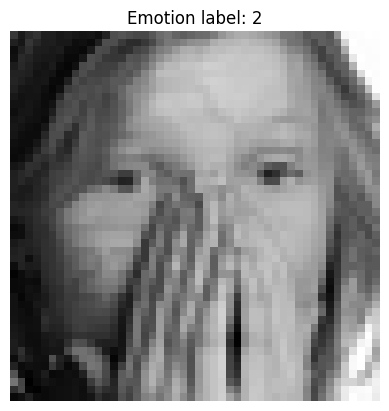

In [3]:
import numpy as np
import matplotlib.pyplot as plt
id = 45 
label = int(data.iloc[id]['emotion'])
pixel_seq = data.iloc[id, 2]
image = np.fromstring(pixel_seq, sep=' ', dtype=np.uint8).reshape(48, 48)

plt.imshow(image, cmap='gray')  # Show as grayscale
plt.title(f'Emotion label: {label}')
plt.axis('off')  # Hide axis ticks
plt.show()


In [4]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)


In [5]:
import sys
sys.path.append("..")  # or "." depending on notebook location

import yaml 
from utils.dataset import DataModule
from torchvision import transforms

# Define any transform (optional)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),        # Flip images horizontally
    transforms.RandomRotation(degrees=10),         # Slight random rotation
    transforms.RandomCrop(48, padding=4),          # Random crop with padding
    # transforms.ToTensor(),                         # Convert to tensor (if not already)
    transforms.Normalize(mean=[0.5], std=[0.5]),   # Normalize
])

with open("../cfgs/cnn_fer.yaml","r") as f:
    cfg = yaml.safe_load(f)
data_cfg = cfg['data_args']
dm = DataModule(
    path=data_cfg['path'],
    transform=transform,
    batch_size=data_cfg['batch_size'],
    num_workers=data_cfg['num_workers'],
    shuffle=True,
    pin_memory=data_cfg['pin_memory']
)

In [6]:
from models.convnetfer_model import ConvNetFer
import torch.nn as nn

# cfg['model_args']['activation'] = eval( cfg['model_args']['activation'])  # e.g., 'nn.ReLU' → nn.ReLU
# cfg['model_args']['norm_layer'] = eval(cfg['model_args']['norm_layer'])
#model = eval(cfg['model_name'])(**cfg['model_args'])


In [7]:
train_loader = dm.get_train_loader()
eval_loader = dm.get_val_loader()

In [8]:
from trainers.cnn_trainer import CNNTrainer

cnn_trainer = CNNTrainer(config = cfg, log_dir='../log/',train_loader=train_loader,eval_loader=eval_loader)

Sequential(
  (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Dropout(p=0.3, inplace=False)
  (5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU(inplace=True)
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Dropout(p=0.3, inplace=False)
  (10): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Dropout(p=0.3, inplace=False)
  (15): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), pa

In [9]:
cnn_trainer.model

ConvNetFer(
  (layers): Sequential(
    (0): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.3, inplace=False)
    (5): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.3, inplace=False)
    (10): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.3, inplace=False)
    (15

In [10]:
cnn_trainer.train()

  0% 0/28709 [00:12<?, ?it/s]

KeyboardInterrupt: 